In [6]:
import numpy as np  
import pandas as pd  # для работы с таблицами
import scipy.stats as stats # При работе со статистикой
import matplotlib.pyplot as plt  # Библиотека для визуализации результатов 

import seaborn as sns # Более продвинутая библиотека для визуализации

# Задания для самостоятельного решения


<div class="alert alert-info">
<b>Задание № 0</b>

Найдите минимально необходимый объем выборки для построения интервальной оценки среднего.

- желаемая точность $\Delta$ = 3;
- дисперсия $\sigma^2$  = 225;
- уровень доверия $\beta$ = 0.95.
    
Ответ округлите до целого
</div>

$$ n = (\frac{Z*\sigma}{\Delta})^2$$
- $\Delta$ - допустимая ошибка/погрешность, 

- $\sigma$ - стандартное отклонение, 

- Z - квантиль нормального распределения

In [26]:
sigma = np.sqrt(225)  # Стандартное отклонение
Z = round(stats.norm.interval(0.95)[1],2)  #  %   # Квантиль нормального распределения. 
delta = 3 #%         #Погрешность

n = round(((sigma*Z)/delta)**2,0)
n

96.0

In [27]:
#Не меняйте этот код, он нужен для проверки вашего ответа ответа!
if n%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(n)) == -6483854632660926687: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.95, а не 0.975. Смотри формулу!")
elif hash(str(n)) != 8942973788178395504: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


<div class="alert alert-info">
<b>Задание № 1</b>

Постройте `98% доверительный интервал` для среднего значения, если известно, что

- объем выборки n = 25;
- среднее значение по выборке $\overline x$ = 130;
- Из достоверных источников известно стандартное отклонение $\sigma = 15$.
    
В ответ укажите длину полученного доверительного интервала (разницу между правым и левым концом), окруленную до целого
</div>

In [10]:
### Ваши код/вычесления...
sigma = 15  # Стандартное отклонение
n = 25 # выборка
confidence = 0.98 # доверительный интервал
m = 130 # среднее значение по выборке

se = sigma / np.sqrt(n)
delta = se * scipy.stats.t.ppf((1 + confidence)/2, n)

L = round(2 * delta,0) #Запишите в эту переменную ваш высчитанный ответ!

print(L)
print(f'{m - delta}, {m}, {m + delta}')



15.0
122.54467847376807, 130, 137.45532152623193


In [63]:
#Не меняйте этот код, он нужен для проверки ответа!
if L%1!=0: print('Вы забыли округлить ответ!!!!')
elif hash(str(L)) == 8859716730303628099: print("Ошибка, вероятно выбран квартиль для уровня доверия 0.98, а не 0.99. Смотри формулу!")
elif hash(str(L)) != 6091462292841498317: print("Нет, Неверно!")
else: print('Верно!!!! Двигайтесь дальше!')
#Если у вас долго не получается запустить эту ячейку без ошибок, но оставьте свой ответ и идите дальше. 

Нет, Неверно!


### 2. Вам даны две выборки роста мужчин и женщин. Докажите, используя t-Тест Стьдента, что различия между выборками незначительно, если уровень значимости равен 0.001

<div class="alert alert-info">
<b>Задание № 2</b>

Даны две выборки роста мужчин и женщин. 
- Докажите, используя `t-Тест Стьдента`, что различие между выборками незначительно, если уровень значимости равен $\alpha$ `= 0.001`.
- Покажите различия визуально
</div>

In [12]:
import scipy.stats as stats

population_men  = stats.norm.rvs(loc=19, scale=171, size=11000000)  # Выборка мужчин со средним ростом 171
population_women = stats.norm.rvs(loc=16, scale=165, size=12000)  # Выборка женщин со средним ростом 165

### Ваш код...
t, p_value = stats.ttest_ind(population_men, population_women)
t, p_value

(2.5730825470352587, 0.010079729323158891)

$\alpha$ `= 0.001` < p_value => Статистически значимых различий между двумя выборками не обнаружено

### 3. Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе, если известно, что в этом городе стандартное отклонение = 150, уровень доверия = 95%. Погрешность 50 рублей. 

<div class="alert alert-info">
<b>Задание № 3</b>

Определите объем необходимой выборки для исследования среднего чека за кофе в случайном городе если известно, что в этом городе:

- стандартное отклонение $\sigma = 150$;
- уровень доверия $\beta$  = 95%;
- Погрешность $\Delta = 50$ рублей.
</div>

In [17]:
sigma = 150
betta = 0.95
delta = 50

Z = round(stats.norm.interval(betta)[1],2)

n = round((Z * sigma / delta) ** 2)
n

35

<div class="alert alert-info">
<b>Задание № 4</b>

Представьте, что вы хотите разоблачить "волшебника" который считает, что умеет предсказывать погоду на завтра, отвечая просто: дождь или солнце. Вы пронаблюдали за ответами "волшебника" в течении какого-то периода времени и получили некие результаты (см.ниже).

Можно ли сказать, что маг действительно умеет предсказывать погоду? Уровень значимости принять за `0.05` ($\alpha=0.05$).
</div>

In [18]:
observations = pd.DataFrame([[10,15],[39,34]],
                            index=['Дождь','Солнце'],
                            columns=['Ответ волшебника','Реальность'])
observations

,Ответ волшебника,Реальность
Дождь,10,15
Солнце,39,34


In [19]:
import scipy.stats as stats
# Учтите, что у тестов, в том чилсле и точного теста Фишера под нелевой гипотезой подразумевается случайность/отсутсвие эффекта


oddsratio, p_value = stats.fisher_exact(observations)#Возможно пригодится эта функция.
p_value

0.35417955365927367

Так как p-value больше уровня значимости, мы не можем отвергнуть нулевую гипотезу.

<div class="alert alert-info">
<b>Задание № 5</b> 

Используя функцию mean_confidence_interval(data, confidence), постройте доверительный интервал с уровнем доверия $\beta = 90\%$ для выборки:

</div>

In [20]:
data = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,6,
        7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

def mean_confidence_interval(data, confidence = 0.95): # 
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    delta = se * stats.t.ppf((1 + confidence)/2, n)
    return m - delta, m , m + delta

mean_confidence_interval(data, confidence=0.9)

(6.074074746111319, 6.628571428571429, 7.183068111031539)

<div class="alert alert-info">
<b>Задание № 6</b>

Принадлежат ли выборки data_1 и data_2 одному множеству? 
    
- Оцените это с помощью известных вам тестов для проверок статистических гипотез;
- Покажите различия визуально.
</div>

In [25]:
data_1 = [4,5,8,9,6,7,5,6,7,8,5,6,7,0,9,8,4,
          6,7,9,8,6,5,7,8,9,6,7,5,8,6,7,9,5,10]

data_2 = [8,5,6,7,0,1,8,4,6,7,0,2,6,5,7,5,3,5,3,
          5,3,5,5,8,7,6,4,5,3,5,4,6,4,5,3,2,6,4,
          2,6,1,0,4,3,5,4,3,4,5,4,3,4,5,4,3,4,5,
          3,4,4,1,2,4,3,1,2,4,3,2,1,5,3,4,6,4,5,
          3,2,4,5,6,4,3,1,3,5,3,4,4,4,2,5,3]

t, p_value = stats.ttest_ind(data_1, data_2)
p_value

2.1159475572725764e-11

p_value < уровня значимости => присутствуют статистически значимые различия, т.е. данные множества принадлежат разным множествам

<AxesSubplot:ylabel='Count'>

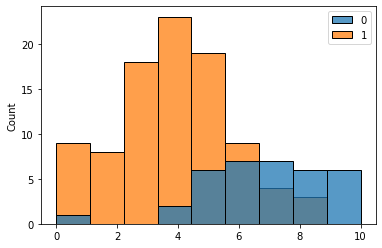

In [22]:
sns.histplot([data_1, data_2])

<div class="alert alert-info">
<b>Задание № 7 (задание без подвоха)</b>

На примере датасета про жилье в New York City, мы сталкивались с примером, когда переменная имеет не совсем нормальное распределение. 

- Предположим, Вы сформировали две гипотезы:
    - нулевая гипотеза - распределение нормальное;
    - альтернативная гипотеза - распределение ненормальное.
- допустим, вы применили какой-то тест (сейчас неважно какой), который показал уровень значимости  `p-value = 0.03`. Каковы будут ваши выводы? Будем считать что у нас нормальное распределение или все-таки нет?)
    
</div>

Так как уровень значимости не указан, исходим из стандартного значения 0.05, тогда p_value меньше уровня значимости, а значит мы отвергаем нулевую гипотезу, что распределение имеет нормальную форму.

<div class="alert alert-info">
<b>Задание № 8</b>
    
Первая выборка — это пациенты, которых лечили препаратом `А`.  Вторая выборка — пациенты, которых лечили препаратом `B`.

Значения в выборках — это некоторая характеристика эффективности лечения (уровень метаболита в крови, температура через три дня после начала лечения, срок выздоровления, число койко-дней, и т.д.) 

- Требуется выяснить, имеется ли значимое различие эффективности препаратов `А` и `B`, или различия являются чисто случайными и объясняются «естественной» дисперсией выбранной характеристики?  (`уровень значимости принять за 0.05 (5%)`)

- При каком минимальном p-value различия были бы уже значимы? 
    
- Если выборки незначительно отличаются, то продемонстрируйте это визуально
</div>

In [33]:
np.random.seed(11)
A = stats.norm.rvs(scale=15,loc=169,size=300)
B = stats.norm.rvs(scale=14,loc=171.4,size=300)

### Ваш код:
# Подсказка, обратите внимание на Two-sample T-test

In [34]:
t_stat, p_value = stats.ttest_ind(A, B)
p_value

0.051284593140469285

Так как p_value больше уровня значимости, значит статистически значимых различий между выборками нет.

 При p_value < 0.05 мы можем говорить о статистически значимом различии. 

<AxesSubplot:ylabel='Count'>

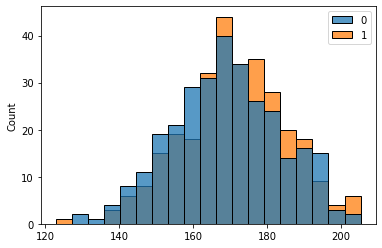

In [35]:
sns.histplot([A, B])